# Text Mining Project: Songs and Artists

Main application idea 
A user has three options:
- The user can fill in a mood (either positive, neutral or negative). After doing so, we will provide the user with artists and songs that fit their mood. We will  do sentiment analysis on the lyrics in order to classify a song as either negative, neutral or positive.
- The user can fill in an artist name (from our top 9 given) that they want more information on/ they want to explore. After doing so, the genre this artist belongs to and corresponding word cloud will be shown. Also the main topics this artist sings about together with a word cloud and the sentiment dsitribution of the artist will be shown. Lastly, some songs (different sentiments) for this artist will be listed as well.
- The user can fill in an artist name together with a sentiment. This will give the user all the information of this artist (similar to the previous option). However, instead of just giving some random song recommendations it will give the user songs within the sentiment that they specified.

This application will allow the user to gain more insight into what kind of songs the artist sings and thus will enable them to identify whether this is a new artist they want to listen to. This application adds value to the user, as currently only popular songs or activity from similar users is recommended by Spotify. We will use sentiment analysis as well as topic analysis to be able to provide more artist info.  Sentiment analysis is used to classify both at an artist-level and at a song-level. Topic analysis will be at the song-level and will show what topics the artist tends to sing about most. 


#### Importing packages and libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Clean and Merge the files

#### Artist data

In [2]:
artists = pd.read_csv('artists-data.csv')
artists.head()

,Artist,Songs,Popularity,Link,Genre,Genres
0,10000 Maniacs,110,0.3,/10000-maniacs/,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,12 Stones,75,0.3,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...
2,311,196,0.5,/311/,Rock,Rock; Surf Music; Reggae; Ska; Pop/Rock; Rock ...
3,4 Non Blondes,15,7.5,/4-non-blondes/,Rock,Rock; Pop/Rock; Rock Alternativo; Grunge; Blue...
4,A Cruz Está Vazia,13,0.0,/a-cruz-esta-vazia/,Rock,Rock


In [3]:
artists.drop(['Popularity'],axis=1,inplace=True)

In [4]:
artists.drop_duplicates(subset ="Artist",keep = False, inplace = True) 

In [5]:
artists.head()

,Artist,Songs,Link,Genre,Genres
1,12 Stones,75,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...
2,311,196,/311/,Rock,Rock; Surf Music; Reggae; Ska; Pop/Rock; Rock ...
3,4 Non Blondes,15,/4-non-blondes/,Rock,Rock; Pop/Rock; Rock Alternativo; Grunge; Blue...
4,A Cruz Está Vazia,13,/a-cruz-esta-vazia/,Rock,Rock
5,Aborto Elétrico,36,/aborto-eletrico/,Rock,Rock; Punk Rock; Pós-Punk; Post-Rock


#### Lyrics data

In [6]:
lyrics = pd.read_csv('lyrics-data.csv')
lyrics.head()

,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH


Only keep the songs written in English

In [7]:
lyrics = lyrics[lyrics['Idiom']=='ENGLISH']
print(lyrics.duplicated(subset='SName').value_counts())

False    70261
True     44462
dtype: int64


Drop duplicate songs

In [8]:
lyrics.drop(['SLink'],axis=1,inplace=True)
lyrics.drop_duplicates(subset =["SName", 'ALink'],keep ='first', inplace = True)

In [9]:
lyrics.head()

,ALink,SName,Lyric,Idiom
0,/10000-maniacs/,More Than This,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,ENGLISH


#### Merge the two Datasets 

Merge on  ALink:

In [10]:
lyrics_artists = pd.merge(artists, lyrics, left_on= 'Link', right_on='ALink')   

In [11]:
lyrics_artists.drop(['ALink'],axis=1,inplace=True)

In [12]:
lyrics_artists.head()

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom
0,12 Stones,75,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...,World So Cold,"It starts with pain, followed by hate. Fueled ...",ENGLISH
1,12 Stones,75,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...,Broken,Freedom!. Alone again again alone. Patiently w...,ENGLISH
2,12 Stones,75,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...,3 Leaf Loser,"Biting the hand that feeds you, lying to the v...",ENGLISH
3,12 Stones,75,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...,Anthem For The Underdog,You say you know just who I am. But you can't ...,ENGLISH
4,12 Stones,75,/12-stones/,Rock,Rock; Gospel/Religioso; Hard Rock; Grunge; Roc...,Adrenaline,My heart is beating faster can't control these...,ENGLISH


#### Select Artists 

We will select a subset of the artists on who we have the most lyrics data on. In order to make sure we can represent artists from different genres, we will pick three artists from the three biggest genres.

In [13]:
HipHop = lyrics_artists[lyrics_artists['Genre'] == 'Hip Hop']
HipHop['Artist'].value_counts().nlargest(10)

50 Cent          462
Eminem           444
Snoop Dogg       436
Tupac Shakur     382
Jay-Z            310
Ne-yo            292
Mary J. Blige    263
Drake            263
Wiz Khalifa      256
Usher            253
Name: Artist, dtype: int64

In [14]:
Rock = lyrics_artists[lyrics_artists['Genre'] == 'Rock']
Rock['Artist'].value_counts().nlargest(10)

Elvis Presley        747
Bob Dylan            534
Neil Young           488
Van Morrison         485
Bruce Springsteen    477
Elvis Costello       474
Rod Stewart          435
David Bowie          432
Rolling Stones       430
Paul McCartney       423
Name: Artist, dtype: int64

In [15]:
Pop = lyrics_artists[lyrics_artists['Genre'] == 'Pop']
Pop['Artist'].value_counts().nlargest(10)

Glee               687
Bee Gees           549
Madonna            322
Michael Jackson    296
Akon               294
Cher               287
Britney Spears     284
Pet Shop Boys      276
Robbie Williams    275
Mariah Carey       264
Name: Artist, dtype: int64

Create new dataframe to work with.

In [16]:
artists_list = ['50 Cent', 'Eminem', 'Snoop Dogg', 'Elvis Presley', 'Bob Dylan', 'Neil Young', 'Glee', 'Bee Gees', 'Madonna']

In [17]:
top10 = lyrics_artists.loc[lyrics_artists['Artist'].isin(artists_list)]

In [18]:
top10.reset_index(inplace=True, drop=True)
top10.head()

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom
0,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Harvest Moon,Come a little bit closer. Hear what I have to ...,ENGLISH
1,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Heart of Gold,"I want to live,. I want to give. I've been a m...",ENGLISH
2,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Old Man,"Old man look at my life,. I'm a lot like you w...",ENGLISH
3,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Rockin' In The Free World,"There's colors on the street red, white, and b...",ENGLISH
4,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,On The Way Home,When the dream came. I held my breath with my ...,ENGLISH


## Dataset Inspection

After removing duplicates how many songs does each artist have?

In [19]:
res = top10[["Artist", "SName"]].groupby(['Artist']).count().sort_values('SName',ascending = False)
res['SName']

Artist
Elvis Presley    747
Glee             687
Bee Gees         549
Bob Dylan        534
Neil Young       488
50 Cent          462
Eminem           444
Snoop Dogg       436
Madonna          322
Name: SName, dtype: int64

#### Count average number of tokens in songs

In [20]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
def countnrwords(text):
    result = []
    for sent in sent_tokenize(text):
        tokens = word_tokenize(sent)
        result.append(tokens)
    flat_list = []
    for sublist in result:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [21]:
df = top10
df['tokenized_text'] = top10['Lyric'].map(countnrwords)
df.head()

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom,tokenized_text
0,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Harvest Moon,Come a little bit closer. Hear what I have to ...,ENGLISH,"[Come, a, little, bit, closer, ., Hear, what, ..."
1,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Heart of Gold,"I want to live,. I want to give. I've been a m...",ENGLISH,"[I, want, to, live, ,, ., I, want, to, give, ...."
2,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Old Man,"Old man look at my life,. I'm a lot like you w...",ENGLISH,"[Old, man, look, at, my, life, ,, ., I, 'm, a,..."
3,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Rockin' In The Free World,"There's colors on the street red, white, and b...",ENGLISH,"[There, 's, colors, on, the, street, red, ,, w..."
4,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,On The Way Home,When the dream came. I held my breath with my ...,ENGLISH,"[When, the, dream, came, ., I, held, my, breat..."


In [22]:
df = df.assign(count = df['tokenized_text'].str.len())

In [23]:
pd.set_option('max_colwidth', 50)
df.head()

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom,tokenized_text,count
0,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Harvest Moon,Come a little bit closer. Hear what I have to ...,ENGLISH,"[Come, a, little, bit, closer, ., Hear, what, ...",207
1,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Heart of Gold,"I want to live,. I want to give. I've been a m...",ENGLISH,"[I, want, to, live, ,, ., I, want, to, give, ....",169
2,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Old Man,"Old man look at my life,. I'm a lot like you w...",ENGLISH,"[Old, man, look, at, my, life, ,, ., I, 'm, a,...",265
3,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Rockin' In The Free World,"There's colors on the street red, white, and b...",ENGLISH,"[There, 's, colors, on, the, street, red, ,, w...",319
4,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,On The Way Home,When the dream came. I held my breath with my ...,ENGLISH,"[When, the, dream, came, ., I, held, my, breat...",145


Average number of words in a song

In [24]:
df['count'].mean()

427.8759905761405

In [25]:
df.groupby('Artist')['count'].mean().sort_values()

Artist
Elvis Presley    198.112450
Neil Young       225.256148
Bee Gees         265.398907
Bob Dylan        338.558052
Glee             366.784571
Madonna          370.177019
50 Cent          711.932900
Snoop Dogg       721.192661
Eminem           898.227477
Name: count, dtype: float64

## Preprocessing 

For our sentiment analysis we do not need to do any tokenization or sentence splitting due to VADER doing this automatically. Therefore for the only pre processing step we carried out is that we removed all words that are in parenthesis, square and curly brackets as these often indicate who is singing, how it has to be sung or it indicates the verse/bridge/ chorus.

Add new column to dataframe to make sure we do not 'overwrite the original data'

In [26]:
top10['preprocessed_lyrics1'] = top10['Lyric'].str.replace(r"[\{\(\[].*?[\)\]\}][.]?", "") 

In [27]:
#top10.reset_index(drop=True, inplace=True)
top10.head()

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom,tokenized_text,preprocessed_lyrics1
0,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Harvest Moon,Come a little bit closer. Hear what I have to ...,ENGLISH,"[Come, a, little, bit, closer, ., Hear, what, ...",Come a little bit closer. Hear what I have to ...
1,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Heart of Gold,"I want to live,. I want to give. I've been a m...",ENGLISH,"[I, want, to, live, ,, ., I, want, to, give, ....","I want to live,. I want to give. I've been a m..."
2,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Old Man,"Old man look at my life,. I'm a lot like you w...",ENGLISH,"[Old, man, look, at, my, life, ,, ., I, 'm, a,...","Old man look at my life,. I'm a lot like you w..."
3,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Rockin' In The Free World,"There's colors on the street red, white, and b...",ENGLISH,"[There, 's, colors, on, the, street, red, ,, w...","There's colors on the street red, white, and b..."
4,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,On The Way Home,When the dream came. I held my breath with my ...,ENGLISH,"[When, the, dream, came, ., I, held, my, breat...",When the dream came. I held my breath with my ...


## Sentiment/ emotion analysis

We will use VADER for the sentiment analysis

In [28]:
def vader_output_to_label(vader_output):
    """
    map vader output e.g.,
    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}
    to one of the following values:
    a) positive float -> 'positive'
    b) 0.0 -> 'neutral'
    c) negative float -> 'negative'
    
    :param dict vader_output: output dict from vader
    
    :rtype: str
    :return: 'negative' | 'neutral' | 'positive'
    """
    compound = vader_output['compound']
    if compound < -0.1:
        return 'Negative'
    elif compound >-0.1 and compound < 0.1: 
        return 'Neutral'
    elif compound > 0.1:
        return 'Positive'

#### Sentiment analysis for each song

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Create lists to store the different scores for each word
all_vader_output = []
realscores = []
pos = []
neg =[]
neu = []
compound = []
#Initialize the model
sid = SentimentIntensityAnalyzer()
#Iterate through each row of lyrics and append the scores
for i in top10.index:
    lyrics = top10['preprocessed_lyrics1'].iloc[i]
    scores = sid.polarity_scores(lyrics)
    pos.append(scores['pos'])
    neg.append(scores['neg'])
    neu.append(scores['neu'])
    compound.append(scores['compound'])
    vader_label = vader_output_to_label(scores)      # convert vader output to category
    all_vader_output.append(vader_label)
    
    realscores.append(scores)
    
#Create 4 columns to the main data frame  for each score
top10['label'] = all_vader_output
top10['scores'] = realscores
top10['neg'] = neg
top10['neu'] = neu
top10['pos'] = pos
top10['compound'] = compound


In [30]:
top10.head()

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom,tokenized_text,preprocessed_lyrics1,label,scores,neg,neu,pos,compound
0,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Harvest Moon,Come a little bit closer. Hear what I have to ...,ENGLISH,"[Come, a, little, bit, closer, ., Hear, what, ...",Come a little bit closer. Hear what I have to ...,Positive,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.000,0.701,0.299,0.9961
1,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Heart of Gold,"I want to live,. I want to give. I've been a m...",ENGLISH,"[I, want, to, live, ,, ., I, want, to, give, ....","I want to live,. I want to give. I've been a m...",Positive,"{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp...",0.000,0.963,0.037,0.3400
2,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Old Man,"Old man look at my life,. I'm a lot like you w...",ENGLISH,"[Old, man, look, at, my, life, ,, ., I, 'm, a,...","Old man look at my life,. I'm a lot like you w...",Positive,"{'neg': 0.035, 'neu': 0.834, 'pos': 0.13, 'com...",0.035,0.834,0.130,0.9676
3,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Rockin' In The Free World,"There's colors on the street red, white, and b...",ENGLISH,"[There, 's, colors, on, the, street, red, ,, w...","There's colors on the street red, white, and b...",Positive,"{'neg': 0.046, 'neu': 0.701, 'pos': 0.253, 'co...",0.046,0.701,0.253,0.9969
4,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,On The Way Home,When the dream came. I held my breath with my ...,ENGLISH,"[When, the, dream, came, ., I, held, my, breat...",When the dream came. I held my breath with my ...,Positive,"{'neg': 0.032, 'neu': 0.78, 'pos': 0.188, 'com...",0.032,0.780,0.188,0.9684


In [31]:
final_label = top10['label'].value_counts()
final_label

Positive    2904
Negative    1697
Neutral       68
Name: label, dtype: int64

In [32]:
top10['label'].groupby(top10['Artist']).value_counts()

Artist         label   
50 Cent        Negative    319
               Positive    141
               Neutral       2
Bee Gees       Positive    394
               Negative    142
               Neutral      13
Bob Dylan      Positive    356
               Negative    173
               Neutral       5
Elvis Presley  Positive    609
               Negative    122
               Neutral      16
Eminem         Negative    353
               Positive     88
               Neutral       3
Glee           Positive    536
               Negative    144
               Neutral       7
Madonna        Positive    232
               Negative     86
               Neutral       4
Neil Young     Positive    342
               Negative    129
               Neutral      17
Snoop Dogg     Negative    229
               Positive    206
               Neutral       1
Name: label, dtype: int64

### Preprocessing 

Before making we make wordclouds, bar graphs with frequency counts, and do topic modelling, we carry out some pre processing steps. These steps include : removing stopwords, lemmatizing, tokenization, lowercasing and removing words that are shorter than 2 characters.  

In [33]:
import gensim
from gensim.utils import tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
stop = stopwords.words('english')
new_stop_words = ['ooh','yeah','hey','whoa','woah', 'ohh', 'was', 'mmm', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah','wa', 'chorus', 'verse', 'bridge', 'intro', 'Whooooooo']
stop.extend(new_stop_words)

def lemmatize_stemming(text):
    return lemmatizer.lemmatize(text)

def preprocess(text):
    result = []
    for token in tokenize(text, lowercase=True, deacc=True):
        if token.lower() not in stop and len(token) > 2:   #not in stop
            result.append(lemmatize_stemming(token))
    return result

In [34]:
top10['preprocessed_lyrics'] = top10['preprocessed_lyrics1'].map(preprocess)


In [35]:
pd.set_option('max_colwidth', 50)
top10.head(2)

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom,tokenized_text,preprocessed_lyrics1,label,scores,neg,neu,pos,compound,preprocessed_lyrics
0,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Harvest Moon,Come a little bit closer. Hear what I have to ...,ENGLISH,"[Come, a, little, bit, closer, ., Hear, what, ...",Come a little bit closer. Hear what I have to ...,Positive,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.0,0.701,0.299,0.9961,"[come, little, bit, closer, hear, say, like, c..."
1,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Heart of Gold,"I want to live,. I want to give. I've been a m...",ENGLISH,"[I, want, to, live, ,, ., I, want, to, give, ....","I want to live,. I want to give. I've been a m...",Positive,"{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp...",0.0,0.963,0.037,0.3400,"[want, live, want, give, miner, heart, gold, e..."


#### Count average number of words in songs

In [36]:
df2 = top10
df2 = df2.assign(count2 = df2['preprocessed_lyrics'].str.len())
df2.head(2)

,Artist,Songs,Link,Genre,Genres,SName,Lyric,Idiom,tokenized_text,preprocessed_lyrics1,label,scores,neg,neu,pos,compound,preprocessed_lyrics,count2
0,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Harvest Moon,Come a little bit closer. Hear what I have to ...,ENGLISH,"[Come, a, little, bit, closer, ., Hear, what, ...",Come a little bit closer. Hear what I have to ...,Positive,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.0,0.701,0.299,0.9961,"[come, little, bit, closer, hear, say, like, c...",68
1,Neil Young,490,/neil-young/,Rock,Rock; Folk; Grunge; Country; Hard Rock; Electr...,Heart of Gold,"I want to live,. I want to give. I've been a m...",ENGLISH,"[I, want, to, live, ,, ., I, want, to, give, ....","I want to live,. I want to give. I've been a m...",Positive,"{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp...",0.0,0.963,0.037,0.3400,"[want, live, want, give, miner, heart, gold, e...",60


Average number of words in a song

In [37]:
df2['count2'].mean()

148.78582137502679

In [38]:
df2.groupby('Artist')['count2'].mean().sort_values()

Artist
Elvis Presley     70.974565
Neil Young        82.702869
Bee Gees          88.531876
Glee             117.627365
Madonna          118.201863
Bob Dylan        122.975655
50 Cent          250.060606
Snoop Dogg       252.720183
Eminem           320.824324
Name: count2, dtype: float64

### Word cloud for each Artist

In [39]:
testdf = top10.groupby('Artist')['preprocessed_lyrics'].apply(list).reset_index()
testdf['preprocessed_lyrics'] = testdf.preprocessed_lyrics.apply(lambda x: sum(x, []))


In [40]:
testdf.head()

,Artist,preprocessed_lyrics
0,50 Cent,"[shawty, birthday, gon, party, like, birthday,..."
1,Bee Gees,"[know, eye, morning, sun, feel, touch, pouring..."
2,Bob Dylan,"[many, road, must, man, walk, call, man, many,..."
3,Elvis Presley,"[end, near, face, final, curtain, friend, say,..."
4,Eminem,"[look, gonna, easy, hurt, feeling, going, get,..."


In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
for i in testdf.index:
    all_text = ''
    all_lyrics = testdf['preprocessed_lyrics'].iloc[i]
    join_lyrics = " ".join(all_lyrics).encode() 
    x = join_lyrics.decode("utf-8")
    all_text += x
    rowIndex = testdf.index[i]
    testdf.loc[rowIndex, 'All_text'] = all_text
display(testdf['All_text'].head())
 
def make_wordcloud(Artist):
    index = testdf.index[testdf['Artist'] == Artist].tolist()
    for i in index:
        wordcloud1 = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
        lyrics1 = testdf['All_text'].iloc[i]
        wordcloud1 = wordcloud1.generate(lyrics1)
        plt.imshow(wordcloud1)
        plt.axis('off')
        print('Word cloud', Artist+ ':')
        plt.show() 


0    shawty birthday gon party like birthday gon si...
1    know eye morning sun feel touch pouring rain m...
2    many road must man walk call man many sea must...
3    end near face final curtain friend say clear s...
4    look gonna easy hurt feeling going get one cha...
Name: All_text, dtype: object

Word cloud 50 Cent:


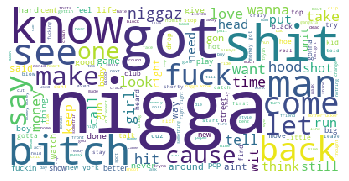

Word cloud Eminem:


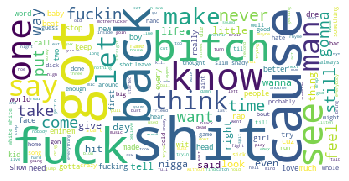

Word cloud Madonna:


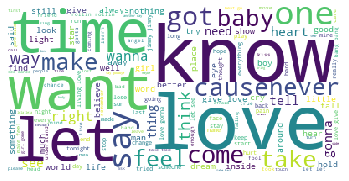

In [42]:
make_wordcloud("50 Cent")
make_wordcloud("Eminem")
make_wordcloud("Madonna")

### Word cloud for each Genre

Word cloud per genre used for our own interpretation of the data → we can identify if there are actual differences between genres 

In [43]:
genre_words= top10.groupby('Genre')['preprocessed_lyrics'].apply(list).reset_index()
genre_words['preprocessed_lyrics']= genre_words.preprocessed_lyrics.apply(lambda x: sum(x, []))

for i in genre_words.index:
    all_text = ''
    all_lyrics = genre_words['preprocessed_lyrics'].iloc[i]
    join_lyrics = " ".join(all_lyrics).encode()
    x = join_lyrics.decode("utf-8")
    all_text += x
    rowIndex = genre_words.index[i]
    genre_words.loc[rowIndex, 'All_text'] = all_text
display(genre_words['All_text'].head())

def make_wordcloudGenre(Genre):
    index = genre_words.index[genre_words['Genre'] == Genre].tolist()
    for i in index:
        x = i
        wordcloud2 = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
        lyrics2 = genre_words['All_text'].iloc[x]
        wordcloud2 = wordcloud2.generate(lyrics2)
        plt.imshow(wordcloud2)
        plt.axis('off')
        print('Word cloud', Genre+ ':')
        plt.show()
    

0    shawty birthday gon party like birthday gon si...
1    life mystery everyone must stand alone hear ca...
2    come little bit closer hear say like child sle...
Name: All_text, dtype: object

Word cloud Rock:


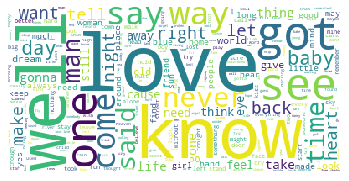

Word cloud Pop:


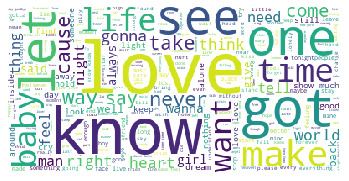

Word cloud Hip Hop:


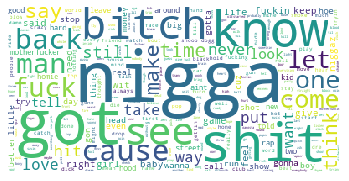

In [44]:
make_wordcloudGenre('Rock')
make_wordcloudGenre('Pop')
make_wordcloudGenre('Hip Hop')

### PIE CHARTS

In [45]:
def make_piechart(Artist):
    artist_pie = top10[top10['Artist']== Artist]
    for i in artist_pie:
        values = artist_pie['label'].value_counts()
        if values.shape[0] != 3:
            label = 'Positive' , 'Negative'
            colors = ['#99ff99','#66b3ff']
        else:
            label = 'Positive', 'Negative', 'Neutral'
            colors = ['#99ff99','#66b3ff', '#ff9999']
    plt.pie(values ,colors = colors, labels = label , autopct='%1.1f%%')
        

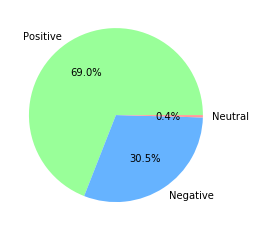

In [46]:
make_piechart("50 Cent")

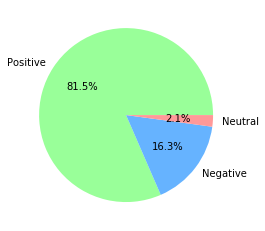

In [47]:
make_piechart("Elvis Presley")

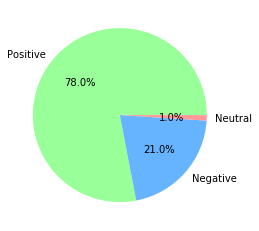

In [48]:
make_piechart("Glee")

## Sort songs from each artist

#### If sentiment and artist is specified by the user

In [49]:
def ordered_songs_by_sentiment(artist, sentiment):
    one_artist = top10[top10['Artist'] == artist]
    if sentiment == 'neg':
        print('Most negative songs:')
        correct_sentiment = one_artist.loc[one_artist['label'] =='Negative']
        sort_by_sentiment = correct_sentiment.sort_values(by=[sentiment], ascending=False).reset_index()
        #display(sort_by_sentiment.head(20))
        total_rows = len(sort_by_sentiment.index)
        #print(total_rows)
        if total_rows <10:
            topsongs = sort_by_sentiment[:total_rows]
        else:
            top10songs = sort_by_sentiment[:10]
   
    elif sentiment == 'pos':
        print('Most positive songs:')
        correct_sentiment = one_artist.loc[one_artist['label'] =='Positive']
        sort_by_sentiment = correct_sentiment.sort_values(by=[sentiment], ascending=False).reset_index()
        #display(sort_by_sentiment.head(15))
        total_rows = len(sort_by_sentiment.index)
        #print(total_rows)
        if total_rows <10:
            top10songs = sort_by_sentiment[:total_rows]
        else:
            top10songs = sort_by_sentiment[:10]
    elif sentiment == 'neu':
        print('Most neutral songs:')
        correct_sentiment = one_artist.loc[one_artist['label'] =='Neutral']
        sort_by_sentiment = correct_sentiment.sort_values(by=[sentiment], ascending=False).reset_index()
        #display(sort_by_sentiment.head(15))
        total_rows = len(sort_by_sentiment.index)
        #print(total_rows)
        if total_rows <10:
            top10songs = sort_by_sentiment[:total_rows]
        else:
            top10songs = sort_by_sentiment[:15]
    
    for i in top10songs.index:
            sentiment_score = top10songs[sentiment].iloc[i]
            songname = top10songs['SName'].iloc[i]
            print(songname)

In [50]:
ordered_songs_by_sentiment("50 Cent",'neg')

Most negative songs:
I Line Niggas
Just Fuckin' Around
Get Out the Club
50 Cent Just F#cking Around
Suicide Watch
Officer Down
Make Money By Any Means
The Funeral
Play This On The Radio
All His Love


In [51]:
ordered_songs_by_sentiment("Bee Gees",'pos')

Most positive songs:
Three Kisses Of Love
Lovers
The Three Kisses Of Love
Don't You Go, I Need Your Love
Our Love (Don't Throw It All Away)
All's Well That Ends Well
(Our Love) Don't Throw It All Away
And I'll Be Happy
Like Nobody Else
Lucky Me


In [52]:
ordered_songs_by_sentiment("Neil Young",'neu')

Most neutral songs:
Let's Go Away For Awhile
I Want To Drive My Car
Till the Morning Comes
Rumblin'
Changing Highways
We R In Control
Sleeps With Angels
Driftin' Back
Daddy Went Walkin'
Fallen Angel
Come On Baby Let's Go Downtown
Stringman
New Mama
One Thing
Good Phone


#### If only the artist is specified by the user

In [53]:
def three_songs_each_sentiment(artist):
    songsretruned = []
    one_artist = top10[top10['Artist'] == artist]
    print('Some song recommendations:')
    correct_sentimentN = one_artist.loc[one_artist['label'] =='Negative']
    sort_by_sentimentN = correct_sentimentN.sort_values(by=['neg'], ascending=False).reset_index()
    topneg = sort_by_sentimentN[:3]
    df1 = topneg[['SName', 'label']].reset_index(drop=True)

    correct_sentimentP = one_artist.loc[one_artist['label'] =='Positive']
    sort_by_sentimentP = correct_sentimentP.sort_values(by=['pos'], ascending=False).reset_index()
    toppos = sort_by_sentimentP[:3]
    df2 = toppos[['SName', 'label']].reset_index(drop=True)

    correct_sentimentN = one_artist.loc[one_artist['label'] =='Neutral']
    sort_by_sentimentN = correct_sentimentN.sort_values(by=['neu'], ascending=False).reset_index()
    topneu = sort_by_sentimentN[:3]
    df3 = topneu[['SName', 'label']].reset_index(drop=True)
    
    frames = [df1, df2, df3]
    result = pd.concat(frames).reset_index(drop=True)
    print(result.to_string(index=False))

In [54]:
three_songs_each_sentiment("50 Cent")

Some song recommendations:
                  SName     label
          I Line Niggas  Negative
    Just Fuckin' Around  Negative
       Get Out the Club  Negative
 Best Friend Ft. Olivia  Positive
      God Gave Me Style  Positive
         Roll That Shit  Positive
     Can I Speak To You   Neutral
     Surrounded By Hoes   Neutral


In [55]:
three_songs_each_sentiment("Elvis Presley")

Some song recommendations:
                       SName     label
       Down by the Riverside  Negative
 I'm So Lonesome I Could Cry  Negative
                     Trouble  Negative
        Merry Christmas Baby  Positive
                      Gently  Positive
                I Beg of You  Positive
      Froggy Went a Courtin'   Neutral
         I Shall Be Released   Neutral
   Out Of Sight, Out Of Mind   Neutral


In [56]:
three_songs_each_sentiment("Snoop Dogg")

Some song recommendations:
                         SName     label
              Down 4 My Niggas  Negative
         I Don't Need no Bitch  Negative
               Lodi Dodi Intro  Negative
                Sticky Fingers  Positive
 Winning (feat. Charlie Sheen)  Positive
               I Love My Momma  Positive
                        So Low   Neutral


#### If only the sentiment is specified by the user

In [57]:
def three_sentiments_each_artist(Sentiment):
    songs = []
    if Sentiment == 'pos':
        print('Songs with a positive sentiment recommended per artist:')
        correct_sentiment = top10.loc[top10['label'] =='Positive'].reset_index(drop=True)
    if Sentiment == 'neu':
        print('Songs with a neutral sentiment recommended per artist:')
        correct_sentiment = top10.loc[top10['label'] =='Neutral'].reset_index(drop=True)
    if Sentiment == 'neg':
        print('Songs with a negative sentiment recommended per artist:')
        correct_sentiment = top10.loc[top10['label'] =='Negative'].reset_index(drop=True)
    
    x = correct_sentiment.groupby('Artist')[Sentiment].nlargest(3).reset_index()
    for i in x.index:
        index = x['level_1'].iloc[i]
        correct_rows = correct_sentiment.iloc[index]
        song = correct_rows['SName']
        songs.append(song)

    x['level_1'] = songs
    x.drop([Sentiment], axis=1, inplace=True)
    x.rename(columns={"level_1":"SName"},inplace = True)
    print(x.to_string(index=False))

In [58]:
three_sentiments_each_artist('neu')

Songs with a neutral sentiment recommended per artist:
        Artist                           SName
       50 Cent              Can I Speak To You
       50 Cent              Surrounded By Hoes
      Bee Gees                   Massachusetts
      Bee Gees                As Fast As I Can
      Bee Gees            Cowman Milk Your Cow
     Bob Dylan      Talkin Hava Negeilah Blues
     Bob Dylan               She Belongs to Me
     Bob Dylan                      Solid Rock
 Elvis Presley          Froggy Went a Courtin'
 Elvis Presley             I Shall Be Released
 Elvis Presley       Out Of Sight, Out Of Mind
        Eminem                 Curtain's Close
        Eminem      Without Me (Skit With Ken)
        Eminem     Public Service Announcement
          Glee               The Rain In Spain
          Glee                 Go Your Own Way
          Glee  It's A Man's Man's Man's World
       Madonna    Is This Love (bon, D'accord)
       Madonna           Eva's Final Broadcast
     

In [59]:
three_sentiments_each_artist('pos')

Songs with a positive sentiment recommended per artist:
        Artist                                               SName
       50 Cent                              Best Friend Ft. Olivia
       50 Cent                                   God Gave Me Style
       50 Cent                                      Roll That Shit
      Bee Gees                                Three Kisses Of Love
      Bee Gees                                              Lovers
      Bee Gees                            The Three Kisses Of Love
     Bob Dylan                                 Somebody Touched Me
     Bob Dylan                           All I Have To do Is Dream
     Bob Dylan                          Can't Help Falling in Love
 Elvis Presley                                Merry Christmas Baby
 Elvis Presley                                              Gently
 Elvis Presley                                        I Beg of You
        Eminem                                             Friends
      

In [60]:
three_sentiments_each_artist('neg')

Songs with a negative sentiment recommended per artist:
        Artist                            SName
       50 Cent                    I Line Niggas
       50 Cent              Just Fuckin' Around
       50 Cent                 Get Out the Club
      Bee Gees                   Bad Bad Dreams
      Bee Gees          Don't Throw It All Away
      Bee Gees              Giving Up The Ghost
     Bob Dylan                Baby, Stop Crying
     Bob Dylan             Everything is Broken
     Bob Dylan            No More Auction Block
 Elvis Presley            Down by the Riverside
 Elvis Presley      I'm So Lonesome I Could Cry
 Elvis Presley                          Trouble
        Eminem                          Revenge
        Eminem         Venger's A Big Fat Bitch
        Eminem                Ken Kaniff (skit)
          Glee                   Hell To The No
          Glee                        I Love It
          Glee              Nasty/Rhythm Nation
       Madonna                  

## Visualise the compound values 

In [61]:
def compound_score(Artist):
    artist_compound = top10[top10['Artist']== Artist]
    compounds = artist_compound['compound'].sum()
    average = artist_compound['Artist'].value_counts().tolist()[0]
    test = round((compounds / average), 6)
    print('Compound score', Artist, ':', test)

In [62]:
Snoop = compound_score('Snoop Dogg')
Fifty_cent = compound_score('50 Cent')
Eminem = compound_score('Eminem')
Elvis_Presley = compound_score('Elvis Presley')
Bob_Dylan = compound_score('Bob Dylan')
Neil_Young = compound_score('Neil Young')
Glee = compound_score('Glee')
Bee_Gees = compound_score('Bee Gees')
Madonna = compound_score('Madonna')

Compound score Snoop Dogg : -0.064555
Compound score 50 Cent : -0.373921
Compound score Eminem : -0.588968
Compound score Elvis Presley : 0.599259
Compound score Bob Dylan : 0.318765
Compound score Neil Young : 0.399641
Compound score Glee : 0.554836
Compound score Bee Gees : 0.452879
Compound score Madonna : 0.433216


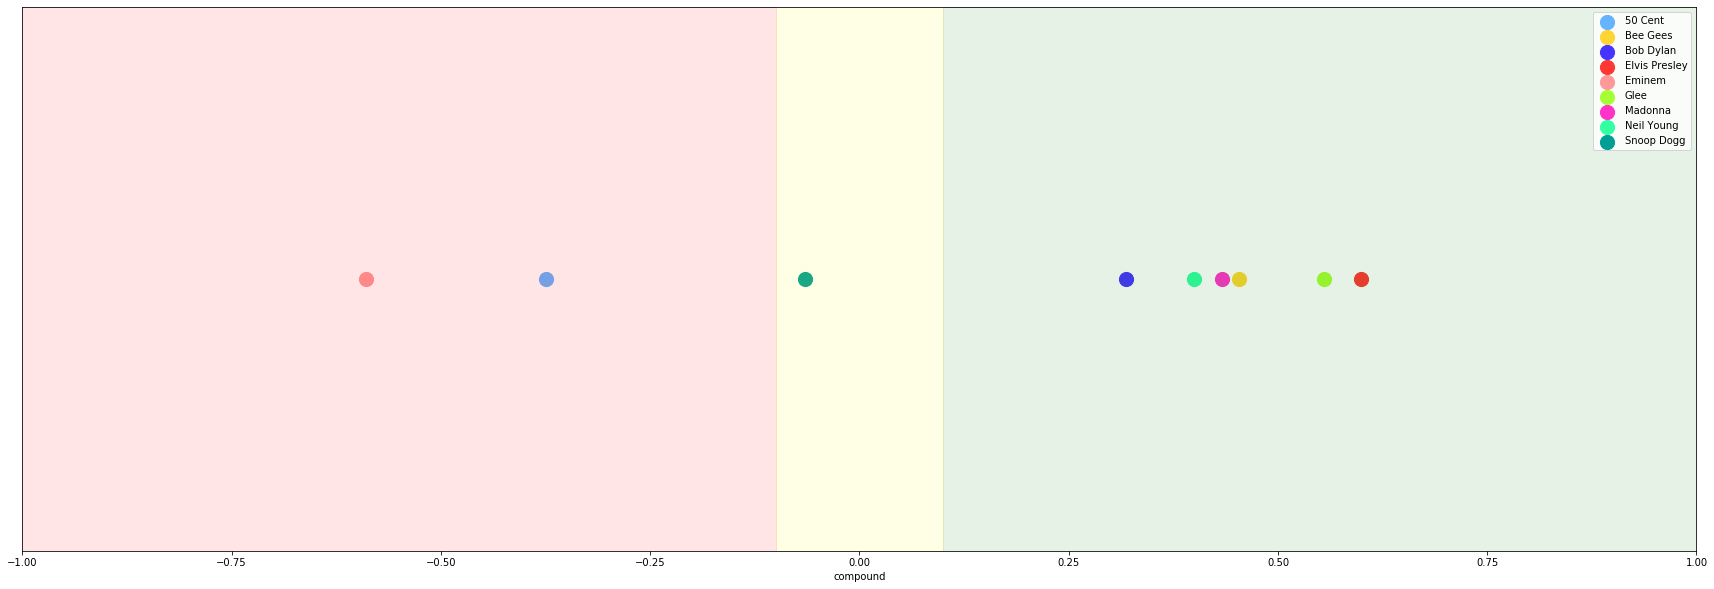

In [63]:
y = [1,1,1,1,1,1,1,1,1]
f = top10.groupby('Artist', as_index=False)['compound'].mean()
f['y']= y
fig, ax1 = plt.subplots(figsize=(30,10))
colors = {'Snoop Dogg':'#009E94', '50 Cent':'#66b3ff', 'Eminem':'#ff9999', 'Elvis Presley':'#FF3733', 'Bob Dylan':'#4633FF', 'Neil Young':'#33FFA3', 'Glee':'#A6FF33', 'Bee Gees':'#FFD533', 'Madonna':'#FF33C8'}
grouped = f.groupby('Artist')
ax1.get_yaxis().set_visible(False)
ax1.axvspan(-0.1, -1, alpha=0.1, color='red')
ax1.axvspan(-0.1, 0.1, alpha=0.1, color='yellow') #could change depending on the scale
ax1.axvspan(0.1, 1, alpha=0.1, color='green')
ax1.set_ylim([0, 2])
ax1.set_xlim([-1, 1])
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='compound', y='y', label=key, color=colors[key], s=200)

plt.show()

### Bar charts of most common words in each sentiment
To show evidence of why we used this scale 

In [64]:
sentiment = top10.groupby('label')['preprocessed_lyrics'].apply(list).reset_index()
sentiment['1sentiment_all_text'] = sentiment.preprocessed_lyrics.apply(lambda x: sum(x, []))
sentiment.head()

,label,preprocessed_lyrics,1sentiment_all_text
0,Negative,"[[make, stand, time, face, man, man, see, cann...","[make, stand, time, face, man, man, see, canno..."
1,Neutral,"[[come, baby, let, downtown, let, let, let, do...","[come, baby, let, downtown, let, let, let, dow..."
2,Positive,"[[come, little, bit, closer, hear, say, like, ...","[come, little, bit, closer, hear, say, like, c..."


In [65]:
from collections import Counter
countscommon = Counter(" ".join(testdf['All_text']).split()).most_common(100)
print(countscommon)
print(" ")
freq = [x[0] for x in countscommon]
unwanted_num = {'love', 'like', 'nigga', 'baby', 'shit', 'bitch', 'girl', 'fuck', 'good', 'money', 'dream', 'friend', 'cry', 'bad', 'fuckin'}
freq = [ele for ele in freq if ele not in unwanted_num]
print(freq)

[('like', 9654), ('get', 8668), ('know', 8488), ('love', 8413), ('got', 7667), ('nigga', 5223), ('one', 4776), ('see', 4719), ('let', 4526), ('come', 4483), ('make', 4279), ('time', 4243), ('back', 4137), ('say', 4067), ('baby', 3831), ('never', 3736), ('cause', 3667), ('want', 3466), ('man', 3427), ('shit', 3419), ('take', 3368), ('way', 3193), ('gonna', 2999), ('wanna', 2900), ('right', 2842), ('bitch', 2833), ('girl', 2737), ('feel', 2580), ('day', 2526), ('life', 2513), ('tell', 2384), ('fuck', 2367), ('night', 2318), ('well', 2308), ('need', 2286), ('give', 2252), ('keep', 2231), ('think', 2212), ('heart', 2198), ('thing', 2102), ('look', 2094), ('could', 2066), ('little', 2030), ('still', 1961), ('said', 1958), ('world', 1947), ('good', 1920), ('put', 1919), ('around', 1901), ('away', 1892), ('eye', 1626), ('long', 1587), ('boy', 1583), ('money', 1540), ('would', 1533), ('every', 1494), ('ever', 1436), ('stop', 1429), ('head', 1428), ('home', 1419), ('hand', 1415), ('better', 141

In [66]:
frequent_excluded_list = []
for x in sentiment.index:
    frequent_excluded = []
    lyrics_sentiment = sentiment['1sentiment_all_text'].iloc[x]
    for i in lyrics_sentiment:
        if i not in freq:
             frequent_excluded.append(i)
    frequent_excluded_list.append(frequent_excluded)
sentiment['1sentiment_all_text_freqexcl'] = frequent_excluded_list

In [67]:
sentiment.head()

,label,preprocessed_lyrics,1sentiment_all_text,1sentiment_all_text_freqexcl
0,Negative,"[[make, stand, time, face, man, man, see, cann...","[make, stand, time, face, man, man, see, canno...","[stand, cannot, sick, within, fighting, making..."
1,Neutral,"[[come, baby, let, downtown, let, let, let, do...","[come, baby, let, downtown, let, let, let, dow...","[baby, downtown, downtown, baby, downtown, dow..."
2,Positive,"[[come, little, bit, closer, hear, say, like, ...","[come, little, bit, closer, hear, say, like, c...","[bit, closer, like, child, sleepin, dream, ful..."


In [68]:
from collections import Counter
most_common = []
for i in sentiment.index:
    lyrics_1_sentiment = sentiment['1sentiment_all_text_freqexcl'].iloc[i]
    most_common1 = Counter(lyrics_1_sentiment).most_common(10)
    most_common.append(most_common1)
 
sentiment['most_common'] = most_common
display(sentiment.head())


,label,preprocessed_lyrics,1sentiment_all_text,1sentiment_all_text_freqexcl,most_common
0,Negative,"[[make, stand, time, face, man, man, see, cann...","[make, stand, time, face, man, man, see, canno...","[stand, cannot, sick, within, fighting, making...","[(like, 4736), (nigga, 4421), (shit, 2845), (b..."
1,Neutral,"[[come, baby, let, downtown, let, let, let, do...","[come, baby, let, downtown, let, let, let, dow...","[baby, downtown, downtown, baby, downtown, dow...","[(went, 38), (like, 30), (rain, 30), (love, 30..."
2,Positive,"[[come, little, bit, closer, hear, say, like, ...","[come, little, bit, closer, hear, say, like, c...","[bit, closer, like, child, sleepin, dream, ful...","[(love, 6787), (like, 4888), (baby, 2683), (gi..."


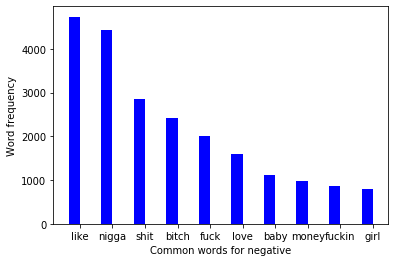

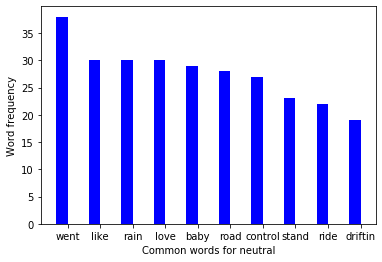

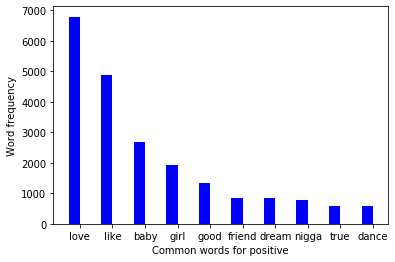

In [69]:
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt
 
for i in sentiment.index:
    data = sentiment['most_common'].iloc[i] # take the most common words per row (sentiment)
    common_words, counts = zip(*data)  # @comment by Matthias
    #common_words = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
    #counts = [x[1] for x in data] # These two lines are equivalent to the the zip-command.
    
    ind = np.arange(len(data))  # the x locations for the groups
    width = 0.35       # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, counts, width, color='b')
 
    # add some text for labels, title and axes ticks
    ax.set_ylabel('Word frequency')
    if i == 0:
        ax.set_xlabel('Common words for negative')
    if i == 1:
        ax.set_xlabel('Common words for neutral')
    if i == 2:
        ax.set_xlabel('Common words for positive')
    ax.set_xticks(ind+width/2.)
    ax.set_xticklabels(common_words)
    plt.show()

### Topic Analysis 

### TF-IDF

In [70]:
from gensim import corpora, models

#topic_stop_words = ['cause', 'as', 'get', 'know', 'wanna', 'let', 'see', 'gonna', 'get', 'time', 'like', 'see', 'back', 'make', 'never', 'little']
#stop.extend(topic_stop_words) 

#def preprocess_topic(text):
#    result = []
#    for token in tokenize(text, lowercase=True, deacc=True):
#        if token.lower() not in stop and len(token) > 2:   #not in stop
#            result.append(token)
#    return result

#top10['preprocessed_lyrics_topic'] = top10['preprocessed_lyrics'].astype(str).map(preprocess_topic)

Artist_list = top10[top10['Artist']== 'Bee Gees']
processed_docs = Artist_list['preprocessed_lyrics']
dictionary = gensim.corpora.Dictionary(processed_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.04507580586878259),
 (1, 0.03585962892886574),
 (2, 0.2528736459212885),
 (3, 0.26636340711769557),
 (4, 0.1820792967860386),
 (5, 0.049397029055152905),
 (6, 0.1523876595210978),
 (7, 0.05750813410254562),
 (8, 0.07603970110747739),
 (9, 0.6455276262857609),
 (10, 0.0963609643774036),
 (11, 0.05257577951155354),
 (12, 0.02488344354532683),
 (13, 0.037069027620287076),
 (14, 0.039754489884398295),
 (15, 0.057190583466723406),
 (16, 0.19379298467153738),
 (17, 0.05571843783755117),
 (18, 0.03131536982811823),
 (19, 0.0633706527591802),
 (20, 0.03796076812905348),
 (21, 0.22018295140439556),
 (22, 0.08009158113111396),
 (23, 0.09262312922213643),
 (24, 0.0316853263795901),
 (25, 0.15133815477758614),
 (26, 0.10416112884251537),
 (27, 0.039185300022361064),
 (28, 0.043954419449498086),
 (29, 0.043242900538068264),
 (30, 0.20698337784261286),
 (31, 0.10386093802017454),
 (32, 0.039754489884398295),
 (33, 0.2197720972474904),
 (34, 0.0910396483930193),
 (35, 0.11429074464082337),
 (3

### RUNNING LDA using TF-IDF 

In [71]:
num_topics = 4
lda_model_tfidf = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=4, random_state= 0)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.023*"know" + 0.022*"got" + 0.017*"love" + 0.010*"never" + 0.009*"see" + 0.009*"life" + 0.008*"world" + 0.008*"one" + 0.008*"man" + 0.008*"night"
Topic: 1 Word: 0.043*"love" + 0.016*"know" + 0.011*"night" + 0.008*"see" + 0.008*"give" + 0.007*"away" + 0.007*"take" + 0.007*"world" + 0.007*"time" + 0.007*"dream"
Topic: 2 Word: 0.047*"love" + 0.020*"never" + 0.014*"one" + 0.012*"life" + 0.012*"let" + 0.012*"make" + 0.011*"know" + 0.010*"got" + 0.009*"say" + 0.009*"see"
Topic: 3 Word: 0.017*"know" + 0.016*"love" + 0.012*"like" + 0.012*"time" + 0.011*"night" + 0.011*"heart" + 0.009*"gonna" + 0.008*"take" + 0.008*"long" + 0.008*"make"


In [72]:
from gensim.models.coherencemodel import CoherenceModel

lda_model_coherence = CoherenceModel(model=lda_model_tfidf, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')

coherence_lda = lda_model_coherence.get_coherence()
print ('\nCoherence Score: ', coherence_lda)



Coherence Score:  -1.2130261690648156


In [73]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model_tfidf, corpus=bow_corpus, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [74]:
def topicArtist(Artist):
    if Artist == "Glee":
        print('Topic 1: Romance - baby, love, heart')
        print('Topic 2: Desire - like, want, get')
        print('Topic 3: Past - back, time, know')
    elif Artist == 'Eminem':
        print('Topic 1: Rap - bitch, fuck, shit')
    elif Artist == '50 Cent':
        print('Topic 1: Wealth and flexing - money, bitch, get')
        print('Topic 2: Rap - nigga, shit, fuck')
    elif Artist == 'Snoop Dogg':
        print('Topic 1: Rap - nigga, shit, bitch')
        print('Topic 2: Desire - like, get, make, girl')
    elif Artist == 'Elvis Presley':
        print('Topic 1: Romance - baby, love, heart')
        print('Topic 2: Desire - girl, get, heart')
        print('Topic 3: Past - time, know, day')
    elif Artist == 'Bob Dylan':
        print('Topic 1: Past - time, know, said')
        print('Topic 2: Romance - love, baby, like')
    elif Artist == 'Bee Gees':
        print('Topic 1: Romance - love, one, life')
    elif Artist == 'Neil Young':
        print('Topic 1: Past - back, time, old')
        print('Topic 2: Romance - like, love, feel')
    elif Artist == 'Madonna':
        print('Topic 1: Desire - get, wanna, want, love')
        print('Topic 2: Romance - love, like, feel')

In [75]:
topicArtist('Glee')

Topic 1: Romance - baby, love, heart
Topic 2: Desire - like, want, get
Topic 3: Past - back, time, know


In [76]:
topicArtist('Neil Young')

Topic 1: Past - back, time, old
Topic 2: Romance - like, love, feel


In [77]:
topicArtist('Glee')

Topic 1: Romance - baby, love, heart
Topic 2: Desire - like, want, get
Topic 3: Past - back, time, know


### Demonstration code 

In [78]:
# code example 1 & 2
def final_outputArtist(Artist=None, Sentiment=None):
    Genre = top10.loc[top10['Artist'] == Artist, 'Genre'].iloc[0]
    print('Genre', Artist+':',Genre)
    make_wordcloud(Artist)  
    topicArtist(Artist)
    print()
    compound_score(Artist)
    print()
    make_piechart(Artist)
    
    if Sentiment != None:
        ordered_songs_by_sentiment(Artist,Sentiment)
    
    if Sentiment == None:
        three_songs_each_sentiment(Artist)
 
    y = [1,1,1,1,1,1,1,1,1]
    f = top10.groupby('Artist', as_index=False)['compound'].mean()
    f['y']= y
    fig, ax1 = plt.subplots(figsize=(30,10))
    colors = {'Snoop Dogg':'#009E94', '50 Cent':'#66b3ff', 'Eminem':'#ff9999', 'Elvis Presley':'#FF3733', 'Bob Dylan':'#4633FF', 'Neil Young':'#33FFA3', 'Glee':'#A6FF33', 'Bee Gees':'#FFD533', 'Madonna':'#FF33C8'}
    grouped = f.groupby('Artist')
    ax1.get_yaxis().set_visible(False)
    ax1.axvspan(-0.1, -1, alpha=0.1, color='red')
    ax1.axvspan(-0.1, 0.1, alpha=0.1, color='yellow') #could change depending on the scale
    ax1.axvspan(0.1, 1, alpha=0.1, color='green')
    ax1.set_ylim([0, 2])
    ax1.set_xlim([-1, 1])
    for key, group in grouped:
        group.plot(ax=ax1, kind='scatter', x='compound', y='y', label=key, color=colors[key], s=200)

    plt.show()



In [79]:
# code example 3
def final_outputSentiment(Sentiment):
    three_sentiments_each_artist(Sentiment)

# DEMONSTRATION

A user can either fill in a sentiment (pos, neg or neu), an artist or both. These are the artists the user can choose from: 50 Cent, Eminem, Snoop Dogg, Elvis Presley, Bob Dylan, Neil Young, Glee, Bee Gees or Madonna.

#### Example 1: filling in an artist and a sentiment that fit the user's mood

Genre Glee: Pop
Word cloud Glee:


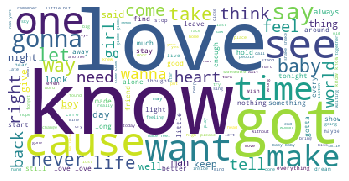

Topic 1: Romance - baby, love, heart
Topic 2: Desire - like, want, get
Topic 3: Past - back, time, know

Compound score Glee : 0.554836

Most positive songs:
All You Need Is Love
Love You Like a Love Song
I Will Always Love You
Cool Kids
Promises, Promises
What I Did For Love
Merry Christmas Darling
Make 'em Laugh
Feliz Navidad
Locked Out Of Heaven


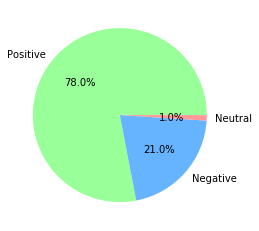

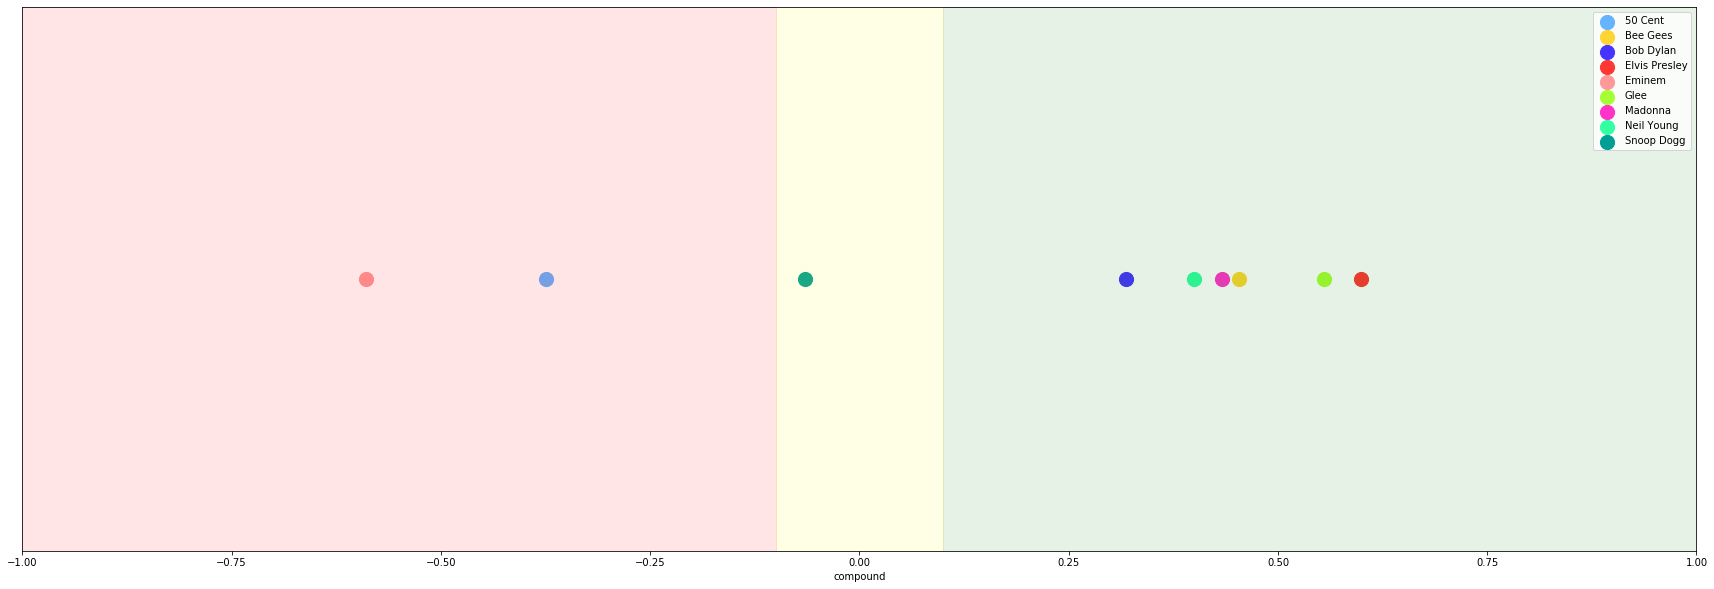

In [80]:
# Artist = 'Glee'
# Sentiment = 'Pos'
final_outputArtist('Glee', 'pos')

#### Example 2: filling in an artist only 

Genre Snoop Dogg: Hip Hop
Word cloud Snoop Dogg:


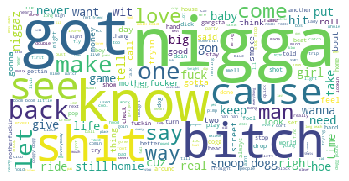

Topic 1: Rap - nigga, shit, bitch
Topic 2: Desire - like, get, make, girl

Compound score Snoop Dogg : -0.064555

Some song recommendations:
                         SName     label
              Down 4 My Niggas  Negative
         I Don't Need no Bitch  Negative
               Lodi Dodi Intro  Negative
                Sticky Fingers  Positive
 Winning (feat. Charlie Sheen)  Positive
               I Love My Momma  Positive
                        So Low   Neutral


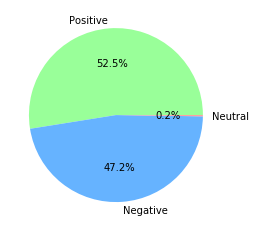

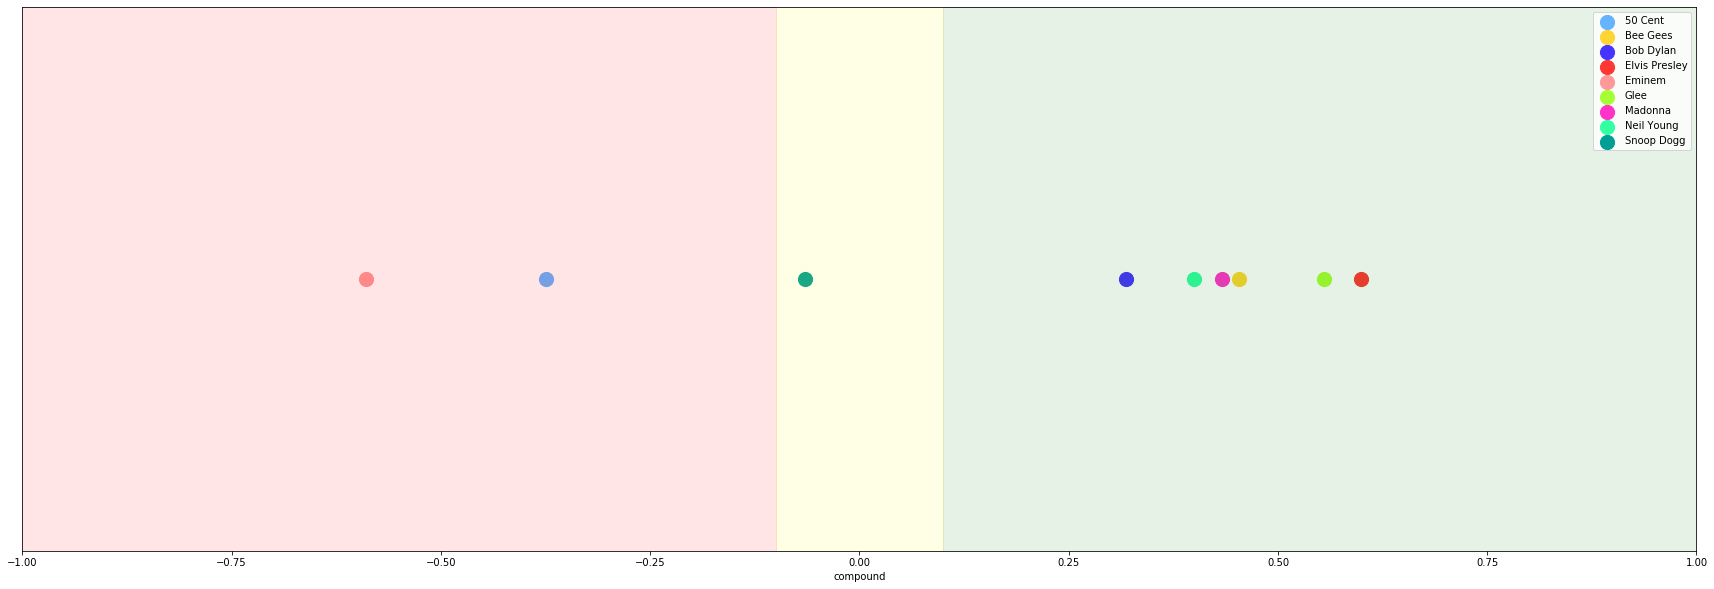

In [81]:
# Artist = 'Glee'
# Sentiment = None
final_outputArtist('Snoop Dogg')

#### Example 3: filling in a sentiment only 

In [82]:
# Artist = None
# Sentiment = 'neg'
final_outputSentiment('neg')

Songs with a negative sentiment recommended per artist:
        Artist                            SName
       50 Cent                    I Line Niggas
       50 Cent              Just Fuckin' Around
       50 Cent                 Get Out the Club
      Bee Gees                   Bad Bad Dreams
      Bee Gees          Don't Throw It All Away
      Bee Gees              Giving Up The Ghost
     Bob Dylan                Baby, Stop Crying
     Bob Dylan             Everything is Broken
     Bob Dylan            No More Auction Block
 Elvis Presley            Down by the Riverside
 Elvis Presley      I'm So Lonesome I Could Cry
 Elvis Presley                          Trouble
        Eminem                          Revenge
        Eminem         Venger's A Big Fat Bitch
        Eminem                Ken Kaniff (skit)
          Glee                   Hell To The No
          Glee                        I Love It
          Glee              Nasty/Rhythm Nation
       Madonna                  

## Confusion Matrix & Classification Report

In [83]:
from sklearn.metrics import confusion_matrix
gold = ["pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", 
        "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu", "neu",
        "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg", "neg"]
vader = ["pos", "neg", "neg", "pos", "pos", "pos", "pos", "neg", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos", "pos","pos",
        "neg", "pos", "pos", "neg", "neg", "neg", "neu", "pos", "pos", "pos", "pos", "pos","pos", "pos", "pos", "pos", "pos", "neg",
        "neg", "pos", "neg", "neg", "neg", "pos", "neg", "neg", "neg", "neg", "pos", "neg", "neg", "neg", "neg", "neg", "pos", "pos"]
confusion_matrix(gold, vader, labels=["pos", "neu", "neg"])

array([[15,  0,  3],
       [12,  1,  5],
       [ 5,  0, 13]], dtype=int64)

In [84]:
from sklearn.metrics import classification_report
report = classification_report(gold, vader,digits = 3)
print(report)

              precision    recall  f1-score   support

         neg      0.619     0.722     0.667        18
         neu      1.000     0.056     0.105        18
         pos      0.469     0.833     0.600        18

    accuracy                          0.537        54
   macro avg      0.696     0.537     0.457        54
weighted avg      0.696     0.537     0.457        54

